In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from TestProblems import prey_predator_model, van_der_pol_model, CSTR_3state_model, CSTR_1state_model

# Test simulations for the test problems

## Prey-predator model

In [58]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = [20, 9]  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

N = 1000

f, J = prey_predator_model(a, b)

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

# Solve using ode15s (method='LSODA')
solution_ode15s = solve_ivp(f, t_span, x0, method='Radau', t_eval=np.linspace(t_span[0], t_span[1], N))

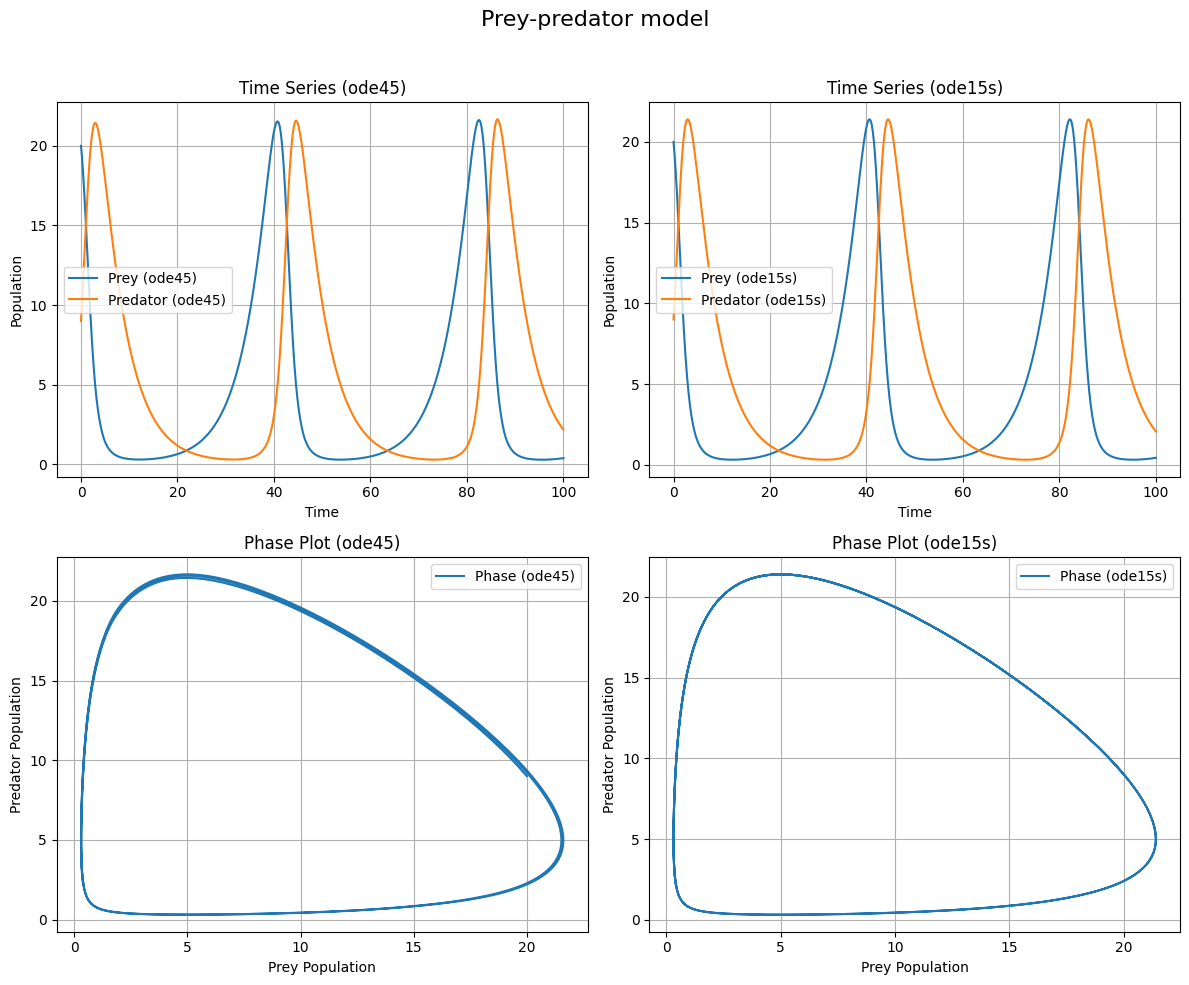

In [59]:
plt.figure(figsize=(12, 10))
plt.suptitle('Prey-predator model', fontsize=16)

# Time series for ode45
plt.subplot(2, 2, 1)
plt.plot(solution_ode45.t, solution_ode45.y[0], label='Prey (ode45)')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='Predator (ode45)')
plt.title('Time Series (ode45)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Time series for ode15s
plt.subplot(2, 2, 2)
plt.plot(solution_ode15s.t, solution_ode15s.y[0], label='Prey (ode15s)')
plt.plot(solution_ode15s.t, solution_ode15s.y[1], label='Predator (ode15s)')
plt.title('Time Series (ode15s)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Phase plot for ode45
plt.subplot(2, 2, 3)
plt.plot(solution_ode45.y[0], solution_ode45.y[1], label='Phase (ode45)')
plt.title('Phase Plot (ode45)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

# Phase plot for ode15s
plt.subplot(2, 2, 4)
plt.plot(solution_ode15s.y[0], solution_ode15s.y[1], label='Phase (ode15s)')
plt.title('Phase Plot (ode15s)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Van der Pol model

In [73]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = [2, 0]  # Initial condition

N = 1000

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

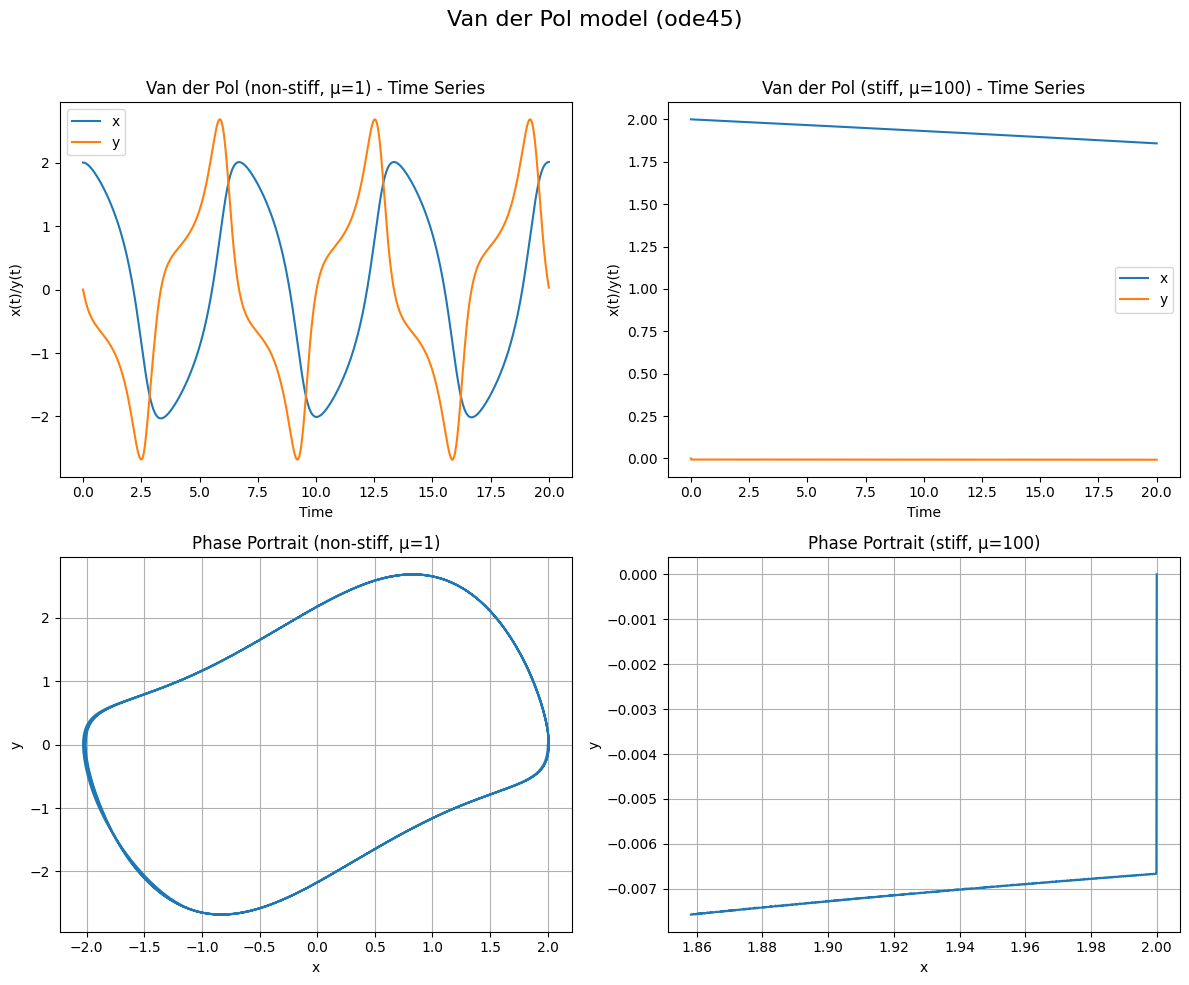

In [74]:
# Plotting time series and phase portraits
plt.figure(figsize=(12, 10))
plt.suptitle('Van der Pol model (ode45)', fontsize=16)

# Plot time series for non-stiff
plt.subplot(2, 2, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Plot time series for stiff
plt.subplot(2, 2, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label='x')
plt.plot(sol_stiff.t, sol_stiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (stiff, μ=100) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Phase portrait for non-stiff
plt.subplot(2, 2, 3)
plt.plot(sol_nonstiff.y[0], sol_nonstiff.y[1], label='Phase (non-stiff, μ=1)')
plt.title('Phase Portrait (non-stiff, μ=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Phase portrait for stiff
plt.subplot(2, 2, 4)
plt.plot(sol_stiff.y[0], sol_stiff.y[1], label='Phase (stiff, μ=100)')
plt.title('Phase Portrait (stiff, μ=100)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [75]:
f_stiff, J_stiff = van_der_pol_model(mu_stiff)
f_nonstiff, J_nonstiff = van_der_pol_model(mu_nonstiff)

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='Radau', t_eval=np.linspace(t_span[0], t_span[1], 1000),jac = J_nonstiff)

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='Radau', t_eval=np.linspace(t_span[0], t_span[1], 1000), jac = J_stiff)

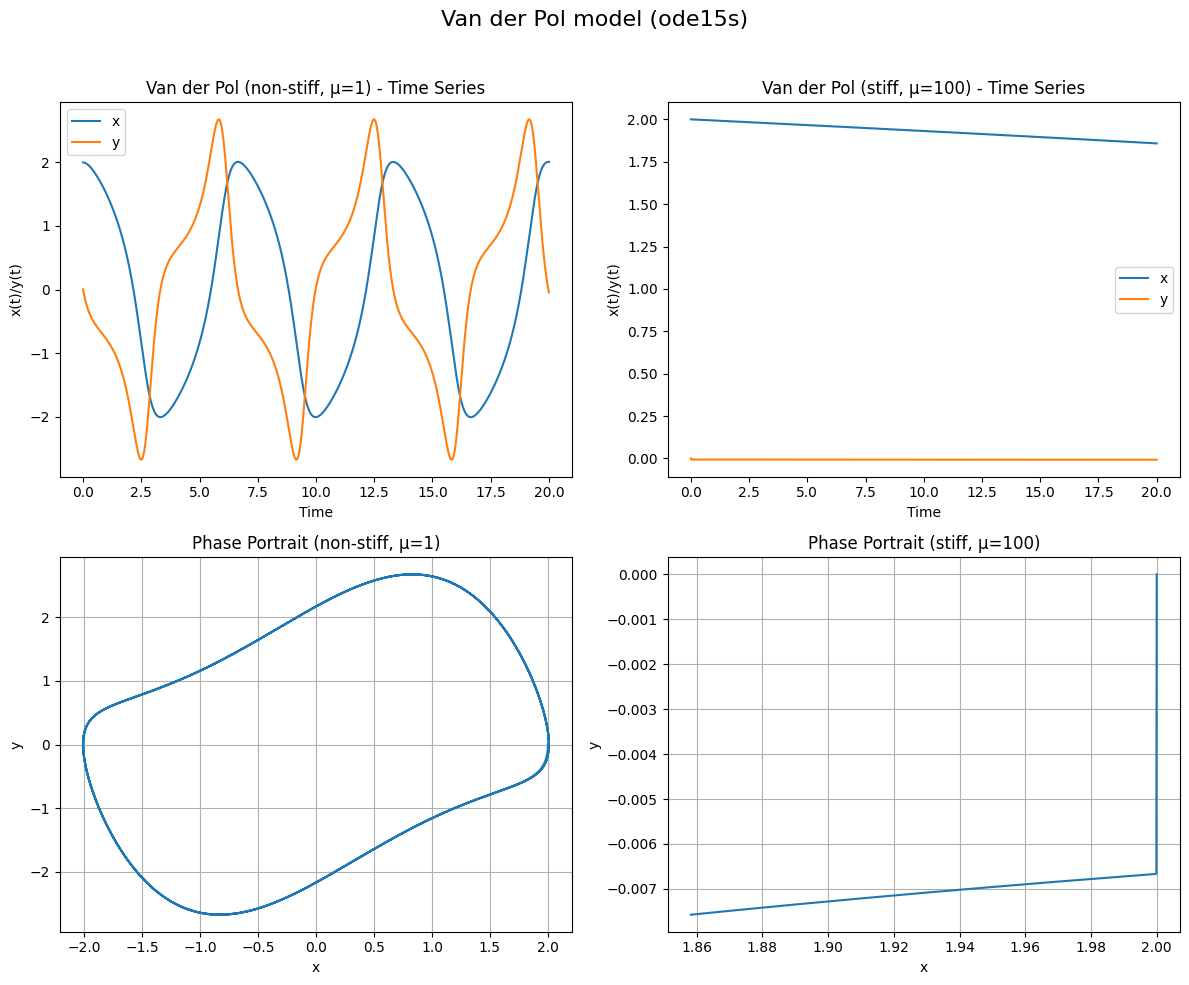

In [76]:
# Plotting time series and phase portraits
plt.figure(figsize=(12, 10))
plt.suptitle('Van der Pol model (ode15s)', fontsize=16)

# Plot time series for non-stiff
plt.subplot(2, 2, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Plot time series for stiff
plt.subplot(2, 2, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label='x')
plt.plot(sol_stiff.t, sol_stiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (stiff, μ=100) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Phase portrait for non-stiff
plt.subplot(2, 2, 3)
plt.plot(sol_nonstiff.y[0], sol_nonstiff.y[1], label='Phase (non-stiff, μ=1)')
plt.title('Phase Portrait (non-stiff, μ=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Phase portrait for stiff
plt.subplot(2, 2, 4)
plt.plot(sol_stiff.y[0], sol_stiff.y[1], label='Phase (stiff, μ=100)')
plt.title('Phase Portrait (stiff, μ=100)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Comparison of implicit and explicit solver

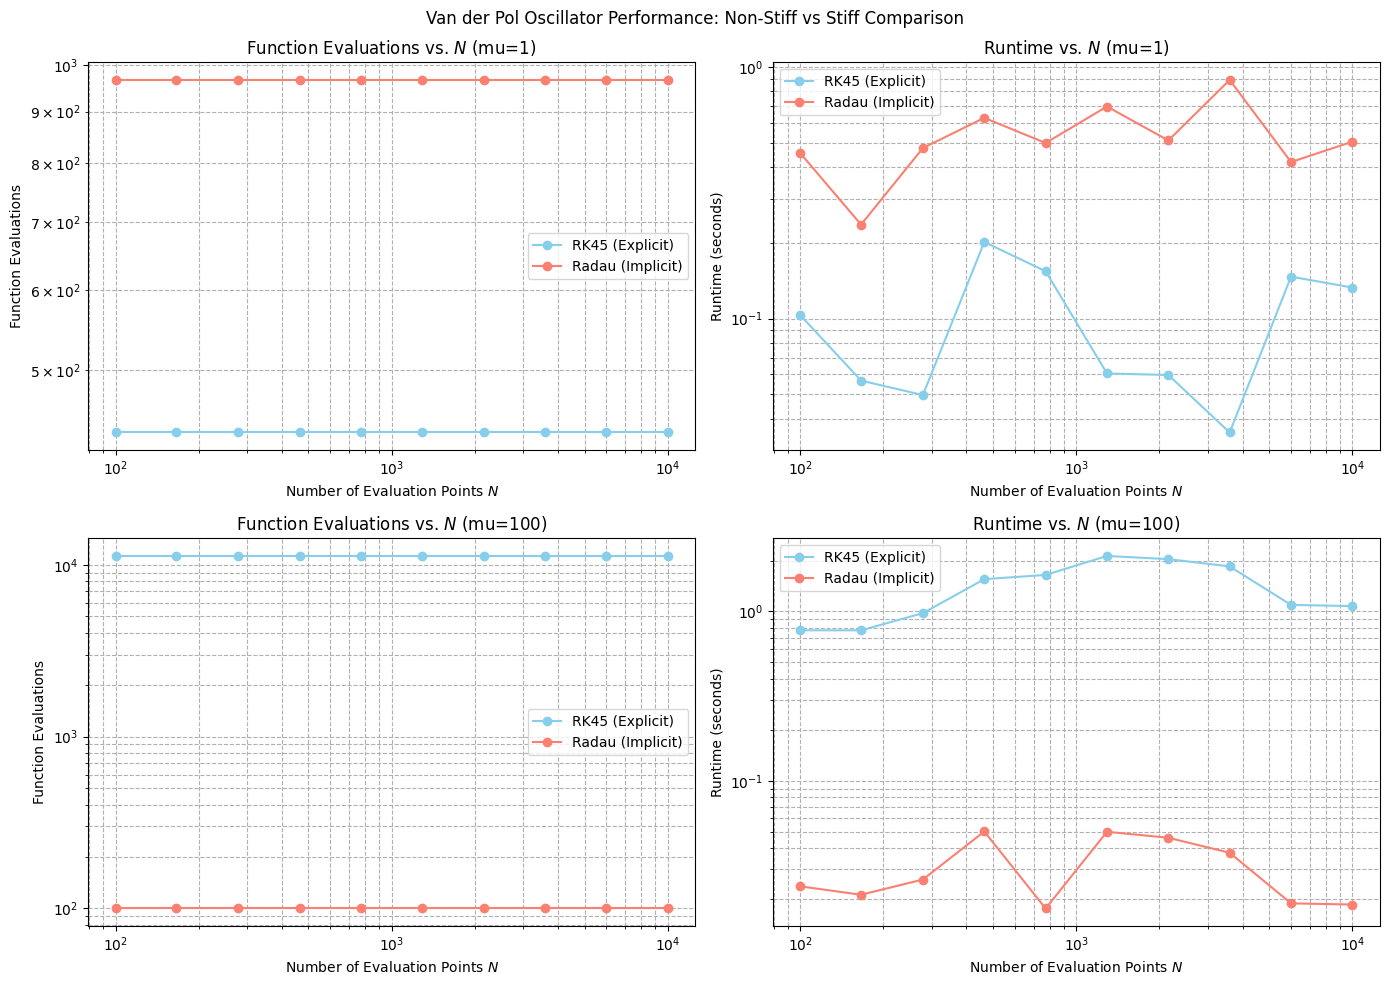

In [ ]:
 import time

# Parameters
t_span = (0, 20)
x0 = [2, 0]

# Function to solve and record performance
def solve_and_record(method, mu, N):
    t_eval = np.linspace(t_span[0], t_span[1], N)
    f, Jac = van_der_pol_model(mu)
    start_time = time.time()
    sol = solve_ivp(f, t_span, x0, method=method, t_eval=t_eval)
    end_time = time.time()
    runtime = end_time - start_time
    nfev = sol.nfev
    return runtime, nfev

# Range of N values to test
N_values = np.logspace(2, 4, 10, dtype=int)  # From 1e2 to 1e4 points

# Mu values to test
mu_values = [1, 100]

# Data storage
results = {}

for mu in mu_values:
    times_rk45 = []
    nfev_rk45 = []
    times_radau = []
    nfev_radau = []
    
    for N in N_values:
        time_rk, nfev_rk = solve_and_record('RK45', mu, N)
        time_rad, nfev_rad = solve_and_record('Radau', mu, N)
        
        times_rk45.append(time_rk)
        nfev_rk45.append(nfev_rk)
        times_radau.append(time_rad)
        nfev_radau.append(nfev_rad)
    
    results[mu] = {
        'times_rk45': times_rk45,
        'nfev_rk45': nfev_rk45,
        'times_radau': times_radau,
        'nfev_radau': nfev_radau,
    }

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, mu in enumerate(mu_values):
    axs[idx, 0].plot(N_values, results[mu]['nfev_rk45'], 'o-', label='RK45 (Explicit)', color='skyblue')
    axs[idx, 0].plot(N_values, results[mu]['nfev_radau'], 'o-', label='Radau (Implicit)', color='salmon')
    axs[idx, 0].set_xscale('log')
    axs[idx, 0].set_yscale('log')
    axs[idx, 0].set_xlabel('Number of Evaluation Points $N$')
    axs[idx, 0].set_ylabel('Function Evaluations')
    axs[idx, 0].set_title(f'Function Evaluations vs. $N$ (mu={mu})')
    axs[idx, 0].legend()
    axs[idx, 0].grid(True, which="both", ls="--")

    axs[idx, 1].plot(N_values, results[mu]['times_rk45'], 'o-', label='RK45 (Explicit)', color='skyblue')
    axs[idx, 1].plot(N_values, results[mu]['times_radau'], 'o-', label='Radau (Implicit)', color='salmon')
    axs[idx, 1].set_xscale('log')
    axs[idx, 1].set_yscale('log')
    axs[idx, 1].set_xlabel('Number of Evaluation Points $N$')
    axs[idx, 1].set_ylabel('Runtime (seconds)')
    axs[idx, 1].set_title(f'Runtime vs. $N$ (mu={mu})')
    axs[idx, 1].legend()
    axs[idx, 1].grid(True, which="both", ls="--")

plt.suptitle("Van der Pol Oscillator Performance: Non-Stiff vs Stiff Comparison")
plt.tight_layout()
plt.show()

## CSTR (3 state model)

In [6]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = [1.0, 0.5, 0.2]  # Initial conditions for CSTR model

f, _ = CSTR_3state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

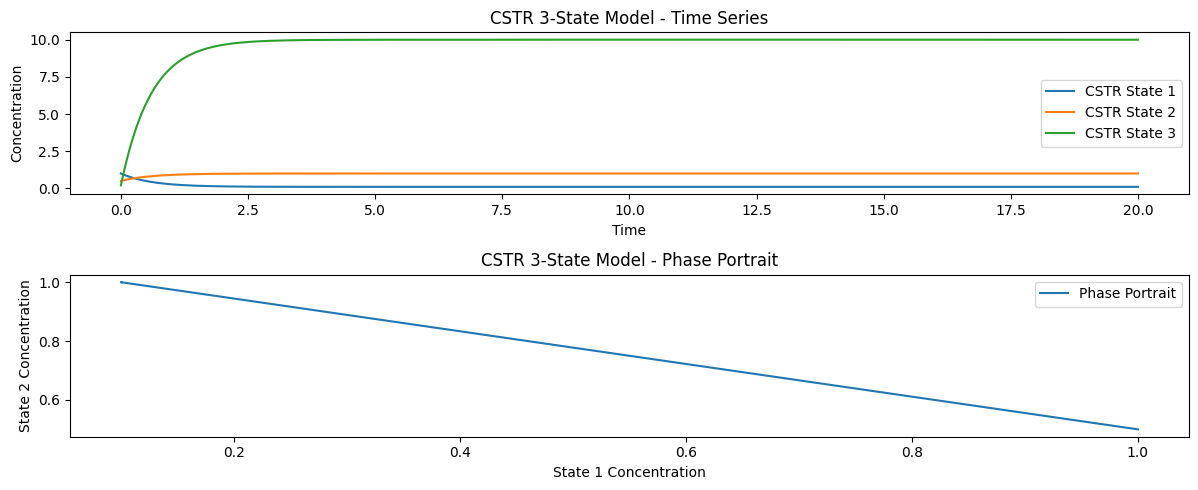

In [7]:
#Plot
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='CSTR State 1')
plt.plot(sol.t, sol.y[1], label='CSTR State 2')
plt.plot(sol.t, sol.y[2], label='CSTR State 3')
plt.title('CSTR 3-State Model - Time Series')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(sol.y[0], sol.y[1], label='Phase Portrait')
plt.title('CSTR 3-State Model - Phase Portrait')
plt.xlabel('State 1 Concentration') 
plt.ylabel('State 2 Concentration')
plt.legend()
plt.tight_layout()
plt.show()

## CSTR (1 state model)

In [8]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = [1.0]  # Initial conditions for CSTR model

f, _ = CSTR_1state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

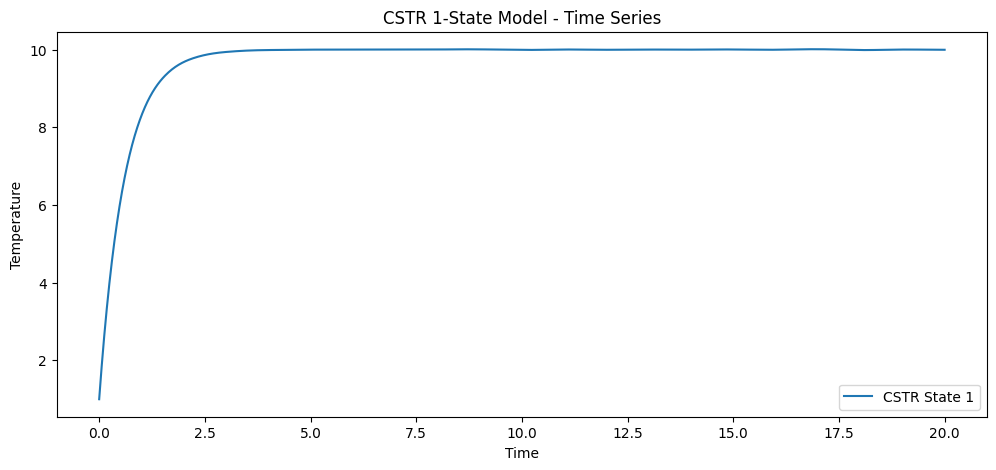

In [11]:
#Plot
plt.figure(figsize=(12, 5))
plt.plot(sol.t, sol.y[0], label='CSTR State 1')
plt.title('CSTR 1-State Model - Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()